In [79]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.optimize import curve_fit
import pandas as pd

%matplotlib widget


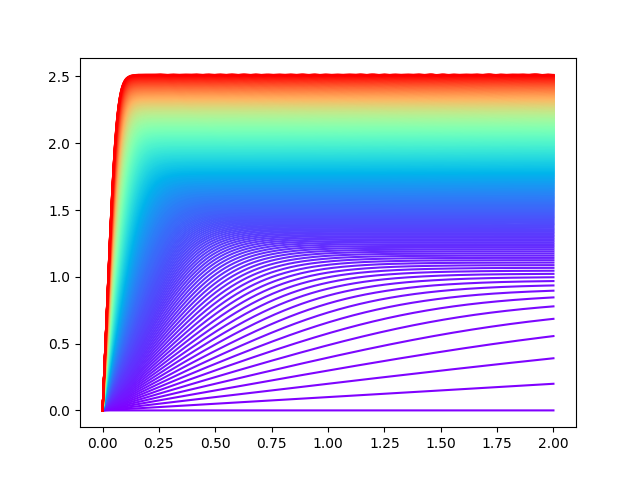

In [106]:
POWER_IN = 6
a = 1

plt.close(1)

span = (0, 2)
t_eval = np.linspace(*span, 2000)
powers = np.arange(0, 40, 0.1)

color = iter(cm.rainbow(np.linspace(0, 1, len(powers))))

fig1, ax1 = plt.subplots(num=1)

def trial(P):
    def deriv(t, T):
        return P - a * T**4
    return solve_ivp(deriv, span, y0=[0], t_eval=t_eval)

ydata = []

for power, c in zip(powers, color):
    solution = trial(power)
    ydata.append(solution["y"][0])
    ax1.plot(solution["t"], solution["y"][0], color=c, label=f"{power}")

block = np.vstack((solution["t"], ydata)).T
data = pd.DataFrame(block, columns=["time"] + list(powers))
data.set_index("time", drop=False, inplace=True)

def get_time_ind(t):
    return np.where(np.logical_and(t_eval >= t - 0.001, t_eval <= t + 0.001))[0][0]


[]

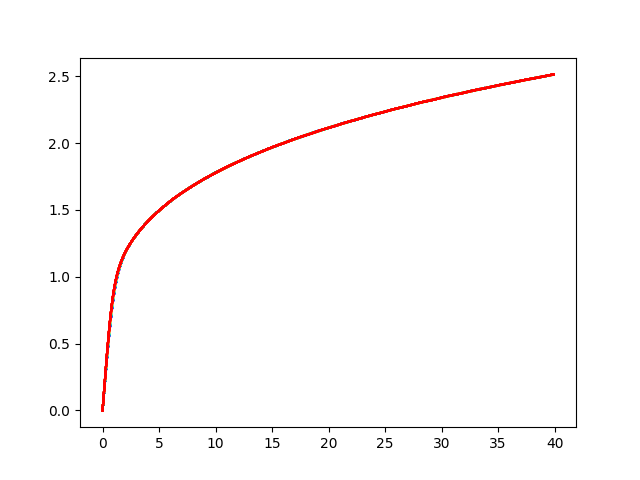

In [108]:
plt.close(2)
fig2, ax2 = plt.subplots(num=2)

def subexp(p, a, b, c):
    return a * (1 - np.exp((p - c) * b))

num = 200
p0 = (2, -1.2, 0)

color = iter(cm.rainbow(np.linspace(0, 1, num)))

for t, c in zip(np.linspace(1, 1.1, num), color):
    y = data.iloc[get_time_ind(t)][1:]
    ax2.plot(powers, y, color=c, markersize=1)
    # params, pcov = curve_fit(subexp, powers[50:], y[20:], p0=p0)
    # ax2.plot(subexp(powers, *params), color=c)

ax2.plot()